# Структура DS проекта и разведочный анализ данных

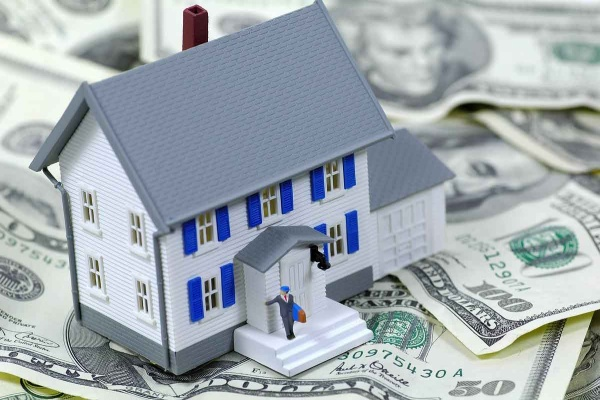

## 0. **Data Science проект:**
1. Постановка задачи (и цикл ее уточнений)
2. Согласование/Получение данных/доступов
_________
3. Анализ данных
4. Визуализация данных
5. Предобработка данных
6. Генерация новых признаков
7. Построение модели
8. Оценка качества
______
9. Внедрение модели
10. Мониторинг качества и улучшение модели

#### Подключение библиотек

In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

#### Путь к файлам

In [ ]:
DATASET_PATH = 'housing.csv'
PREPARED_DATASET_PATH = 'housing_prepared.csv'
CALIFORNIA_MAP_PATH = 'California_Map.png'

## 1. Постановка задачи

**Описание задачи:**

*Цель* - предсказать стоимость дома

*Зачем?*  

_В банках, страховых компаниях:_
- Узнать истинную стоимость имущества (залога)
- Принять решение о выдаче ипотеки/страховки
- Принять решение о % по ипотеке/страховке
  
_На площадках объявлений (Авито, Циан, ...):_
- Найти недооцененные квартиры (~ выгодные предложения), показать их пользователям
- Показывать рыночную стоимость квартиры пользователям
- Для тех, кто продает квартиру, рекомендовать цену продажи

_Для инвесторов в недвижимость:_
- Определять рыночную стоимость квартир
- Поиск недооцененных активов
- Торговля на рынке недвижимости

**Описание датасета:**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года. (https://www.kaggle.com/datasets/camnugent/california-housing-prices)

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома в квартале
* **total_rooms** - общее количество комнат в квартале
* **total_bedrooms** - общее количество спальных мест в квартале
* **population** - количество проживающих в квартале
* **households** - количество проживающих на дом в квартале (среднее?)
* **ocean_proximity** - близость океана
* **median_income** - средний доход проживающих в квартале (в десятках тысяч USD)
* **median_house_value** - средняя стоимость дома (в USD)

In [40]:
# загрузим датасет и посмотрем первые 5 строк
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.tail(5)

In [30]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2889,-118.99,35.39,52.0,2805.0,573.0,1325.0,522.0,2.5083,70100.0,INLAND
12750,-121.38,38.62,34.0,2352.0,610.0,1127.0,592.0,2.2000,116500.0,INLAND
7670,-118.07,33.92,36.0,1560.0,320.0,1348.0,314.0,3.6220,174000.0,<1H OCEAN
6062,-117.84,34.00,26.0,797.0,117.0,383.0,114.0,6.8758,253800.0,<1H OCEAN
163,-122.25,37.81,46.0,3232.0,835.0,1373.0,747.0,3.2250,218800.0,NEAR BAY


In [ ]:
df.shape

## 2. Типы данных

### Про типа переменных

Типы данных являются важным понятием статистики, которое необходимо понимать, чтобы правильно применять статистические измерения к вашим данным и, следовательно, правильно сделать определенные предположения о них.  
Вам также необходимо знать, с каким типом данных вы имеете дело, чтобы выбрать правильный метод визуализации.


*Почему типы данных важны?*  
Типы данных являются важной концепцией, потому что статистические методы могут использоваться только с определенными типами данных.  
Вы должны анализировать непрерывные данные иначе, чем категориальные данные, иначе это приведет к неправильному анализу.  
Поэтому, зная типы данных, с которыми вы имеете дело, вы сможете выбрать правильный метод анализа.

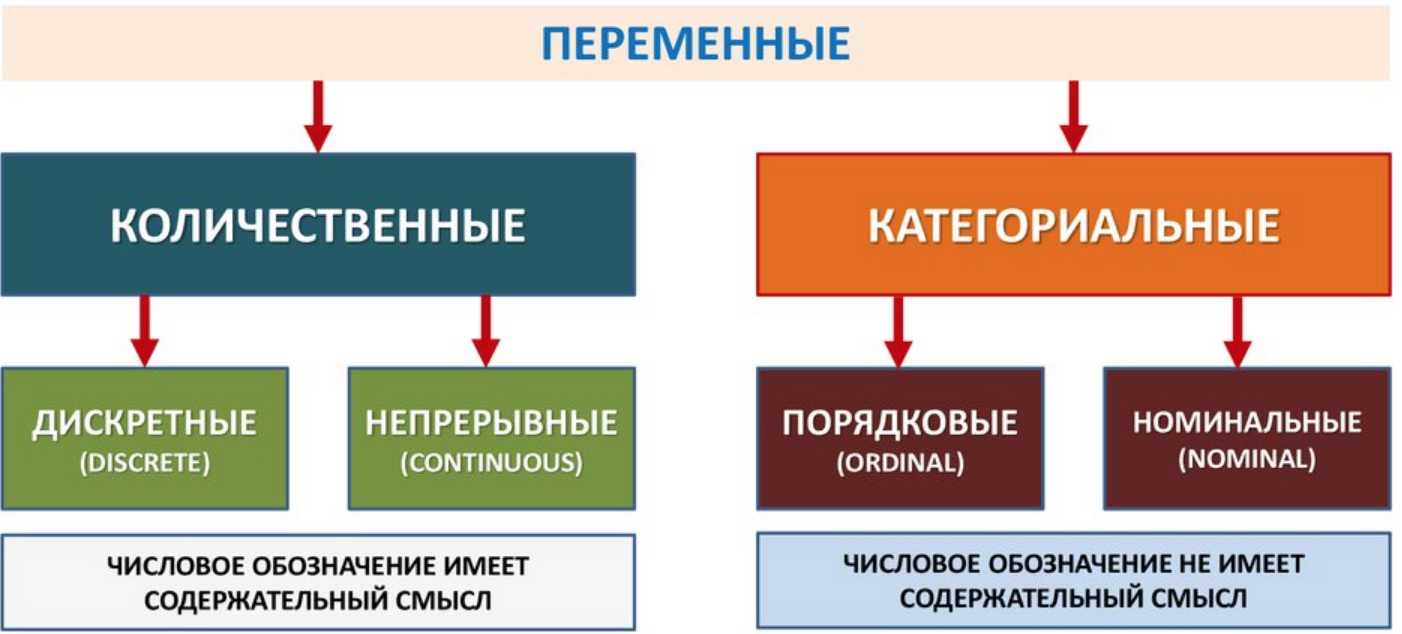

In [ ]:
# посмотрим на типы данных
df.dtypes

In [ ]:
df.sample(5)

## EDA - разветочный анализа данных --> идем в отдельный notebook

## 3. Обработка пропусков

Часто может быть так, что часть данных в DataSet-e пропущена. Такие ситуации нужно как-то обработать. К примеру, заполнить данными.

**Вопрос:** Зачем вообще заполнять пропуски?  
**Ответ:** Дело в том, что не все методы машинного обучения могут работать с пропущенными значениями.

In [31]:
df.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [41]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Строки с пропусками можно проигнорировать и вычистить из выборки, а можно их заполнить. Например:
- Медианой:

In [ ]:
median = df['total_bedrooms'].median()
median


np.float64(435.0)

In [43]:
df['total_bedrooms'].fillna(median, inplace=True)

In [44]:
# проверка
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

- Модой:

In [45]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9131
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
-                5
Name: count, dtype: int64

In [46]:
df['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

In [47]:
df = df.replace({'ocean_proximity':{'-': df['ocean_proximity'].mode()[0]}})

In [48]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

**Важно:** если для тренировки своих моделей вы будете разбивать исходную выборку данных на подвыборки - то методика заполнения пропусков должна быть единой!

## 4. Обработка выбросов

Также в данных могут встретиться аномальные значения.  
Что можно предпринять?
1. Исключить такие данные из выборки
2. Заменять выбросы разными методами (медианы, средние значения и т.д.)
3. Делать/не делать дополнительную фичу
4. Ничего не делать

In [55]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,longitude_outlier
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.0
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,0.0
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,0.0
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.0
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.0
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,0.0
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,0.0
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,0.0


Возможные значения longtitude (долгота) и latitude (широта) можно найти [здесь](https://dateandtime.info/ru/citycoordinates.php?id=5332748)



_Широта принимает значения от −90° до 90°. 0° – широта экватора; −90° – широта Южного полюса; 90° – широта Северного полюса. Положительные значения соответствуют северной широте (точки севернее экватора, сокращённо с.ш. или N); отрицательные – южной широте (точки южнее экватора, сокращённо ю.ш. или S).  
Долгота отсчитывается от нулевого меридиана (IERS Reference Meridian в системе WGS 84) и принимает значения от −180° до 180°. Положительные значения соответствуют восточной долготе (сокращённо в.д. или E); отрицательные – западной долготе (сокращённо з.д. или W)._

Калифорнии находится в западном и северном полушарии.


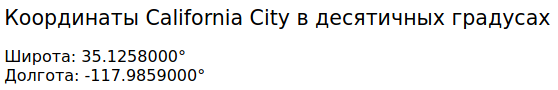

## 5. Отбор и построение новых признаков

Feature Engineering - область DS, основанная на добавлении, удалении или изменении признаков в ваших наборах данных для улучшения модели машинного обучения.

### Количественные переменные

In [56]:
# Доля спален в общем кол-ве комнат
df['bedroom_share'] = df['total_bedrooms'] / df['total_rooms'] * 100

# Сколько человек в среднем живут в одной комнате
df['population_per_room'] = df['population'] / df['total_rooms']

In [57]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,longitude_outlier,bedroom_share,population_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,15.579659,0.338217
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,12.951602,0.338105
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,18.445840,0.437991
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,17.209588,0.347265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,22.462462,0.507508
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,21.520803,0.510760
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,21.517303,0.446761
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,21.989247,0.398387


### Категориальные переменные

Неплохой обзор по работе с категориальными признаками можно посмотреть [здесь](https://dyakonov.org/2016/08/03/python-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8/)

**A) Бинарные (дамми) переменные** <br>

Дамми-переменные (или фиктивные переменные) — это бинарные переменные, которые используются для представления категориальных данных числовым образом. Они принимают значения 0 и 1, где 0 означает отсутствие определенного признака, а 1 — его присутствие.

<br>

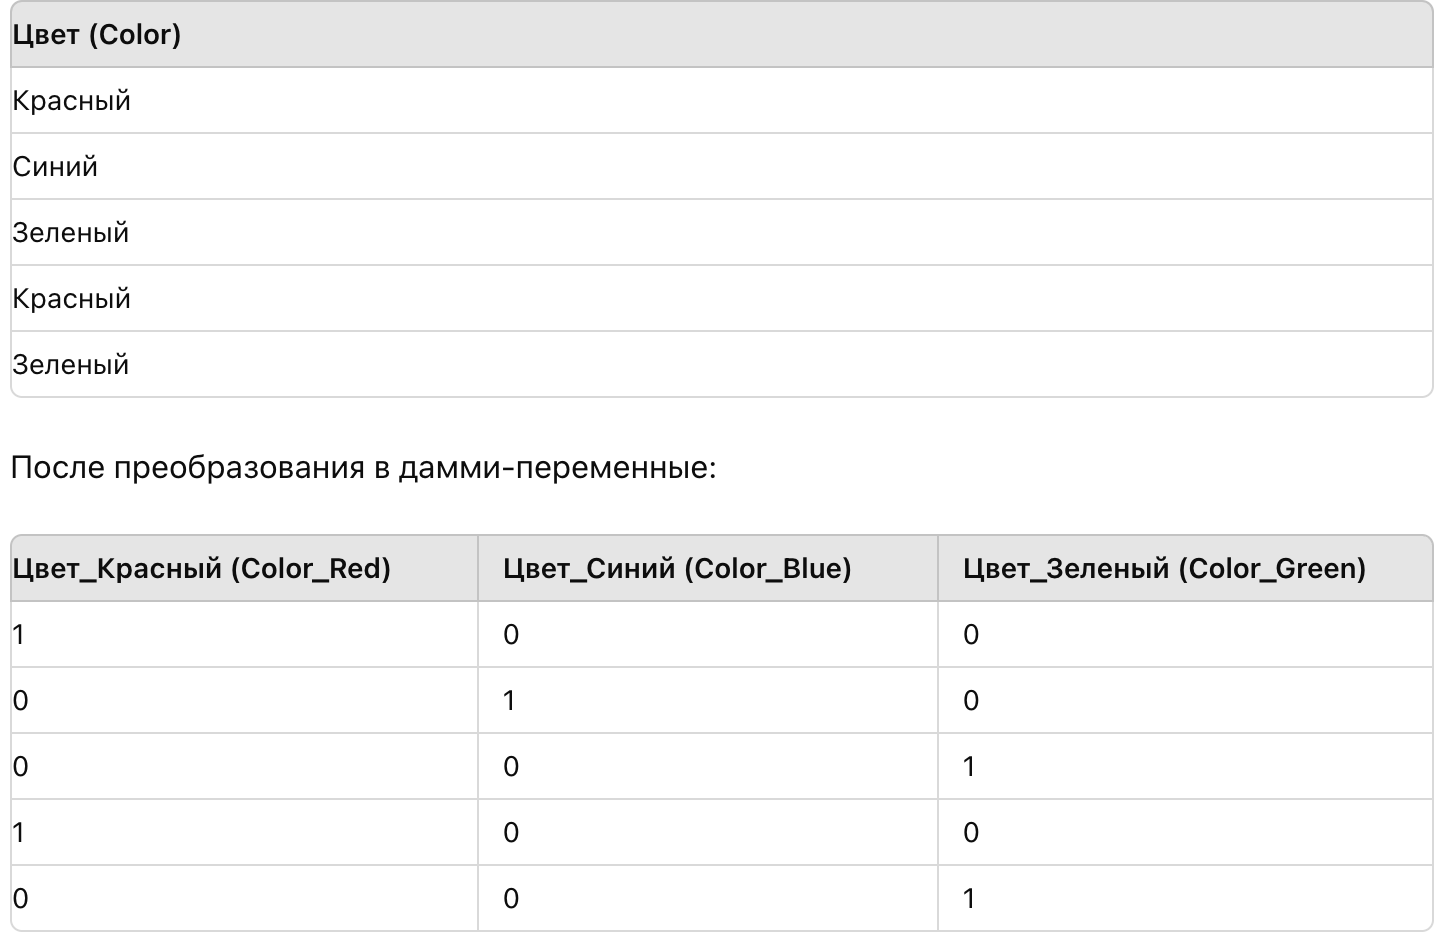

In [58]:
pd.get_dummies(df['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [59]:
df = pd.concat([df, pd.get_dummies(df['ocean_proximity'])], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,longitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,15.579659,0.338217,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,12.951602,0.338105,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,18.445840,0.437991,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,17.209588,0.347265,False,False,False,True,False


**Б) Feature encoding** - описание категории каким-то числом.  
Например, текстовый адрес можно было бы описать грубо - индексом, или более точно - с помощью координат.

In [61]:
df_cat = df.groupby('ocean_proximity', as_index=False).median()[['ocean_proximity', 'total_rooms']]
df_cat = pd.DataFrame(df_cat)

df_cat

,ocean_proximity,total_rooms
0,<1H OCEAN,2108.0
1,INLAND,2131.0
2,ISLAND,1675.0
3,NEAR BAY,2083.0
4,NEAR OCEAN,2195.0


In [ ]:
df_cat.rename(columns={'total_rooms': 'median_rooms'}, inplace=True)

df_cat.sort_values(by='median_rooms')

In [ ]:
df = df.merge(df_cat, on='ocean_proximity')

df.head(3)

Описание методов можно посмотреть [здесь](https://towardsdatascience.com/encoding-categorical-features-21a2651a065c)

- [Feature discretization](https://towardsdatascience.com/an-introduction-to-discretization-in-data-science-55ef8c9775a2)

**возраст дома (0-100)**

1 категория - новые дома (до 5 лет),<br>2 категория - дома от 5 до 10<br>...

- [Feature binarization](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789808452/1/ch01lvl1sec17/binarization)

только 2 признака

1 - новый дом,<br>0 - старый

### Обратное геокодирование

In [62]:
!pip install reverse_geocoder

     ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
     ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
     ------------------------------------- -- 2.1/2.2 MB 7.3 MB/s eta 0:00:01
     ---------------------------------------- 2.2/2.2 MB 7.3 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for reverse_geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268124 sha256=7c90d94d30bcb2cccaec9c601403249810a207446337468f1cd38761f4ad1942
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\61\62\ae\e0593fd403b7274fa


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
import reverse_geocoder as revgc

revgc.search((df.iloc[10].latitude, df.iloc[10].longitude))

Loading formatted geocoded file...


[{'lat': '37.87159',
  'lon': '-122.27275',
  'name': 'Berkeley',
  'admin1': 'California',
  'admin2': 'Alameda County',
  'cc': 'US'}]

In [64]:
revgc.search((55.755864, 37.617698))

[{'lat': '55.75222',
  'lon': '37.61556',
  'name': 'Moscow',
  'admin1': 'Moscow',
  'admin2': '',
  'cc': 'RU'}]

Идея:

- Найти координаты центров городов, достопримечательностей, станций метро, ..
- Считать расстояние до <...>
- Количество <...> в радиусе 3 км
- ...

## 6. Сохранение результатов

In [66]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,longitude_outlier,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,14.659091,0.365909,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,15.579659,0.338217,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,12.951602,0.338105,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,18.445840,0.437991,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,17.209588,0.347265,False,False,False,True,False


In [ ]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')